In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL','yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434924
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [3]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [4]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


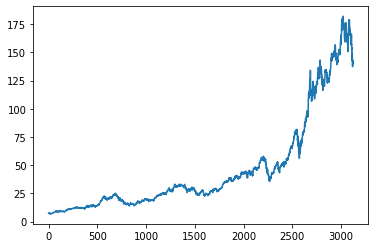

In [5]:
plt.plot(df.Close)

In [6]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3117,141.660004,136.600006,139.880005,137.350006,136095600.0
3118,140.699997,132.610001,139.089996,137.589996,137194600.0
3119,143.259995,137.649994,137.789993,143.110001,117726300.0
3120,141.970001,137.330002,140.809998,140.360001,103890900.0


In [7]:
ma100 =df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3117    165.9020
3118    165.4850
3119    165.1223
3120    164.7439
3121    164.3646
Name: Close, Length: 3122, dtype: float64

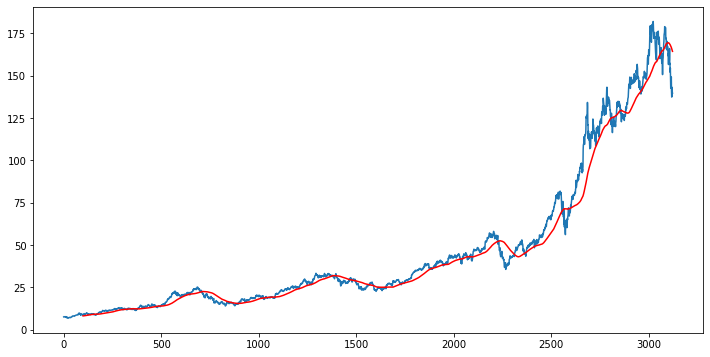

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 =df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3117    159.62320
3118    159.57585
3119    159.56070
3120    159.53205
3121    159.50225
Name: Close, Length: 3122, dtype: float64

In [10]:
df.shape

(3122, 5)

# splitting data into training and Testing

In [11]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2185, 1)
(937, 1)


In [12]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [13]:
data_testing.head()

,Close
2185,55.775002
2186,55.325001
2187,54.582500
2188,55.962502
2189,55.267502


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.99636681],
       [1.        ],
       [0.99258424]])

In [16]:
data_training_array.shape

(2185, 1)

In [17]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)


## ML Model


In [18]:
from keras.layers import Dense, Dropout ,LSTM
from keras.models import Sequential

In [19]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))

model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))

model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))

model.add(Dropout(0.5))



model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam',loss ='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
66/66 [==============================] - 17s 180ms/step - loss: 0.0246
Epoch 2/50
66/66 [==============================] - 12s 178ms/step - loss: 0.0052
Epoch 3/50
66/66 [==============================] - 12s 182ms/step - loss: 0.0050
Epoch 4/50
66/66 [==============================] - 14s 210ms/step - loss: 0.0047
Epoch 5/50
66/66 [==============================] - 15s 225ms/step - loss: 0.0045
Epoch 6/50
66/66 [==============================] - 15s 221ms/step - loss: 0.0043
Epoch 7/50
66/66 [==============================] - 15s 227ms/step - loss: 0.0036
Epoch 8/50
66/66 [==============================] - 15s 231ms/step - loss: 0.0035
Epoch 9/50
66/66 [==============================] - 17s 265ms/step - loss: 0.0033
Epoch 10/50
66/66 [==============================] - 15s 227ms/step - loss: 0.0030
Epoch 11/50
66/66 [==============================] - 15s 232ms/step - loss: 0.0036
Epoch 12/50
66/66 [==============================] - 15s 234ms/step - loss: 0.0029
Epoch 13/50
6

In [22]:
model.save('keras_model.h5')

In [23]:
data_testing.head()

,Close
2185,55.775002
2186,55.325001
2187,54.582500
2188,55.962502
2189,55.267502


In [24]:
data_training.tail(100)

,Close
2085,43.955002
2086,44.560001
2087,44.459999
2088,43.200001
2089,41.430000
...,...
2180,55.744999
2181,56.257500
2182,56.907501
2183,57.090000


In [25]:
past_100_days=data_training.tail(100)

In [26]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Apurva\AppData\Local\Temp/ipykernel_16172/3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [27]:
final_df.head()

,Close
0,43.955002
1,44.560001
2,44.459999
3,43.200001
4,41.430000


In [28]:
input_data =scaler.fit_transform(final_df)
input_data

array([[0.05740378],
       [0.06153453],
       [0.06085175],
       ...,
       [0.73440303],
       [0.7156269 ],
       [0.71071095]])

In [29]:
input_data.shape

(1037, 1)

In [30]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [31]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(937, 100, 1)
(937,)


# Making predictions

In [32]:
y_predicted=model.predict(x_test)

30/30 [==============================] - 6s 151ms/step


In [33]:
y_predicted.shape

(937, 1)

In [34]:
y_test

array([0.13810704, 0.13503457, 0.12996501, 0.13938723, 0.13464199,
       0.14375694, 0.13937014, 0.1291969 , 0.1298114 , 0.13003328,
       0.13286677, 0.12882138, 0.13416403, 0.13655373, 0.13353247,
       0.14126483, 0.14261331, 0.14520781, 0.1486558 , 0.15341813,
       0.14645388, 0.14013825, 0.13925067, 0.14454211, 0.12660237,
       0.12334215, 0.13641717, 0.1283093 , 0.13648544, 0.13484681,
       0.12602203, 0.13163779, 0.13392506, 0.13747546, 0.12443458,
       0.13247419, 0.12649996, 0.11956987, 0.1213792 , 0.13086968,
       0.13660494, 0.1114449 , 0.10139113, 0.10511224, 0.115661  ,
       0.11316891, 0.10630708, 0.08872578, 0.08541435, 0.07614578,
       0.08401469, 0.08763335, 0.07454126, 0.05938379, 0.05904241,
       0.05137833, 0.05535546, 0.05470684, 0.06614321, 0.06377059,
       0.06211488, 0.07276608, 0.0588888 , 0.05552616, 0.04489204,
       0.04678673, 0.04513101, 0.04593327, 0.04909106, 0.03975419,
       0.03712555, 0.0407613 , 0.03191943, 0.02498933, 0.01457

In [35]:
y_predicted

array([[0.17942303],
       [0.18103752],
       [0.18262167],
       [0.18405491],
       [0.18527892],
       [0.1862511 ],
       [0.18699992],
       [0.18755713],
       [0.18790895],
       [0.18804204],
       [0.18795696],
       [0.1876804 ],
       [0.18723485],
       [0.186683  ],
       [0.18610623],
       [0.18555307],
       [0.18509653],
       [0.18480247],
       [0.18472491],
       [0.18490726],
       [0.18539026],
       [0.18614672],
       [0.18708004],
       [0.18807428],
       [0.18904924],
       [0.18987489],
       [0.19043052],
       [0.19068094],
       [0.19059923],
       [0.19023307],
       [0.18965645],
       [0.1889042 ],
       [0.18803686],
       [0.18713258],
       [0.18628687],
       [0.185499  ],
       [0.18478379],
       [0.18412685],
       [0.18347803],
       [0.18279286],
       [0.18210253],
       [0.18148395],
       [0.1808911 ],
       [0.18022248],
       [0.17939615],
       [0.17840992],
       [0.1772905 ],
       [0.176

In [36]:
scaler.scale_

array([0.00682769])

In [37]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

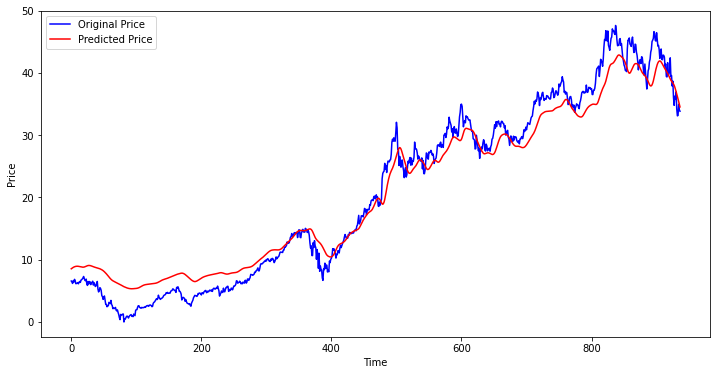

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()